In [2]:
import pandas as pd
import numpy as np

In [3]:
def readcsv(filename):
    return pd.read_csv(filename)

In [31]:
import quandl
quandl.ApiConfig.api_key = "jXPHrf-GmUoyAdmhjcxF"
def extractdata(name):
    data = quandl.get(name)
    data=data.reindex(columns=['Open','Total Trade Quantity'])
    return data
    
l={}    
for i in range(0,10):
    l[codes.values[i,0]]=extractdata(codes.values[i,0])
    
print(l.keys())  

dict_keys(['NSE/3IINFOTECH', 'NSE/3MINDIA', 'NSE/A2ZMES', 'NSE/AANJANEYA', 'NSE/AARTIDRUGS', 'NSE/AARTIIND', 'NSE/AARVEEDEN', 'NSE/ABAN', 'NSE/ABB', 'NSE/ABBOTINDIA'])


In [18]:
for i in range(0,codes.shape[0]):
    s=codes.values[i,0]
    t=s.split('/')
    print(t[1])

3IINFOTECH
3MINDIA
A2ZMES
AANJANEYA
AARTIDRUGS
AARTIIND
AARVEEDEN
ABAN
ABB
ABBOTINDIA
ABCIL
ABGSHIP
ABHISHEK
ABIRLANUVO
ACC
ACE
ACKRUTI
ACROPETAL
ADANIENT
ADANIPOWER
ADFFOODS
ADHUNIK
ADORWELD
ADSL
ADVANIHOTR
ADVANTA
AEGISCHEM
AFL
AFTEK
AGCNET
AGRE
AGRODUTCH
AHLEAST
AHLUCONT
AHLWEST
AHMEDFORGE
AIAENG
AJANTPHARM
AJMERA
AKSHOPTFBR
AKZOINDIA
ALBK
ALCHEM
ALEMBICLTD
ALFALAVAL
ALKALI
ALKYLAMINE
ALLCARGO
ALLSEC
ALMONDZ
ALOKTEXT
ALPA
ALPHAGEO
AMAR
AMARAJABAT
AMARJOTHI
AMBIKCO
AMBUJACEM
AMDIND
AMRUTANJAN
AMTEKAUTO
AMTEKINDIA
ANANTRAJ
ANDHRABANK
ANDHRSUGAR
ANGIND
ANIKINDS
ANSALAPI
ANSALHSG
APARINDS
APCOTEXIND
APIL
APLAB
APLLTD
APOLLOHOSP
APOLLOTYRE
APPAPER
APTECHT
AQUA
ARCHIES
ARIES
ARIHANT
ARL
AROGRANITE
ARROWTEX
ARSHIYA
ARSSINFRA
ARVIND
ASAHIINDIA
ASAHISONG
ASAL
ASHAPURMIN
ASHCONIUL
ASHIANA
ASHIMASYN
ASHOKA
ASHOKLEY
ASIANHOTNR
ASIANPAINT
ASIANTILES
ASIL
ASSAMCO
ASTEC
ASTERSILI
ASTRAL
ASTRAMICRO
ASTRAZEN
ATFL
ATLANTA
ATLASCYCLE
ATNINTER
ATUL
AURIONPRO
AUROPHARMA
AUSOMENT
AUTOAXLES
AUTOIND
AUTOLI

CNX_ALPHA_INDEX
NIFTY_DIVIDEND
CNX_DIVIDEND_OPPT
NI15
CNX_LOW_VOLATILITY
8KMILES
AGARIND
AGRITECH
ANKITMETAL
ATULAUTO
ARCOTECH
BAFNAPHARM
BSLIMITED
CAPLIPOINT
BUTTERFLY
CNOVAPETRO
CAPF
CASTROLIND
CARERATING
CEREBRAINT
CGCL
CYIENT
CINELINE
DCMSHRIRAM
DRDATSONS
DALMIAREF
DALMIABHA
DCBBANK
DUNCANSLTD
DYNATECH
FCEL
FLFL
FRL
FRLDVR
GREENFIRE
HATSUN
GSCLCEMENT
HIL
GULFCORP
IBULHSGFIN
IIFL
INFRATEL
INTEGRA
IPAPPM
JPOLYINVST
JUSTDIAL
JSWHL
KITEX
LYPSAGEMS
LINDEINDIA
MAHINDCIE
MOHITIND
MAYURUNIQ
NAKODA
MMWL
NAVNETEDUL
NDL
NGCT
NIBL
NATHBIOGEN
ORBTEXP
PALRED
PEL
PILIND
PHOENIXLL
PIRPHYTO
ORIENTCEM
PCJEWELLER
PRESSMN
PFRL
RAIN
RAMCOCEM
PROZONECSC
REPCOHOME
ROSSELLIND
SDBL
SHRIASTER
SKIL
SFCL
SREEL
SITICABLE
SUJANATWR
SSLT
TARAJEWELS
SUNCLAYLTD
TGBHOTELS
UJAAS
UPL
VAIBHAVGBL
VAKRANGEE
VIVIDHA
VMART
UTTAMVALUE
VIMALOIL
WONDERLA
ZUARIGLOB
IGOLD
CPSEETF
ICNX100
ZEEMEDIA
ZUARI
RELCNX100
RELNIFTY
RELDIVOPP
RELCONS
A2ZINFRA
AXISCADES
CAMLINFINE
CCHHL
CIGNITITEC
CREST
DPL
DTIL
FCL
GANECOS
GENUSPAPER
GOOD

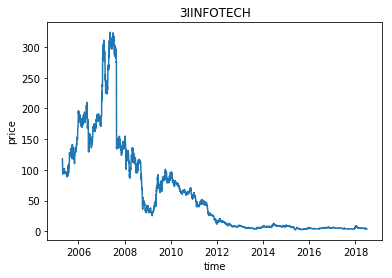

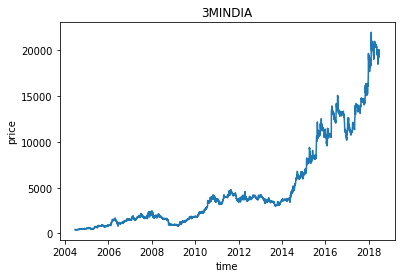

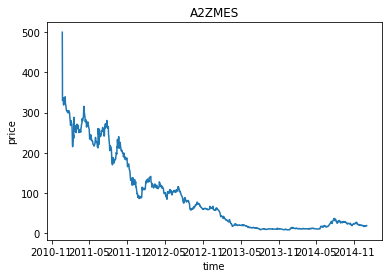

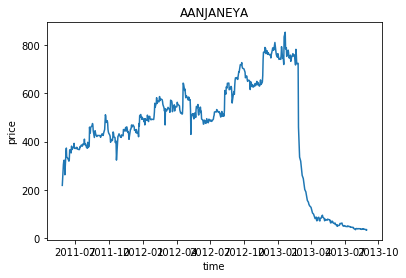

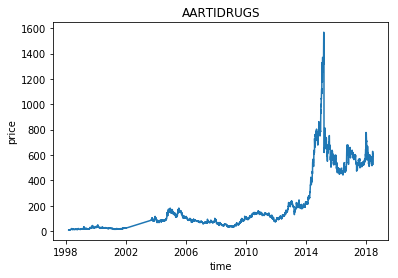

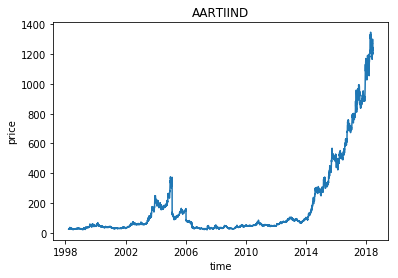

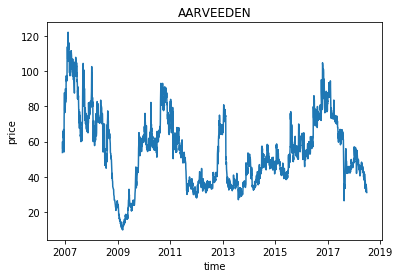

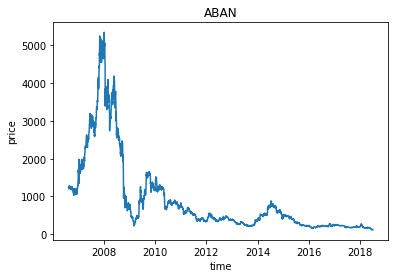

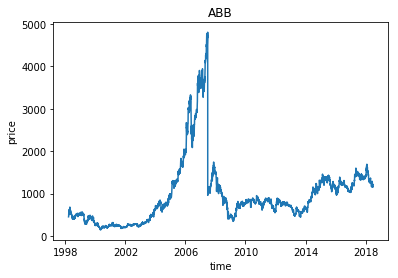

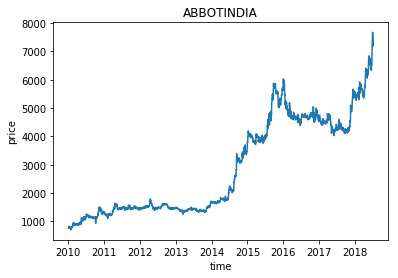

In [36]:
import matplotlib.pyplot as plt
def plotgraph(name,company):
    plt.plot(company['Open'])
    plt.title(name.split('/')[1])
    plt.xlabel("time") 
    plt.ylabel("price")                     
    plt.show()
    
for i in l.keys():
    plotgraph(i,l[i])

In [38]:
start_date='2018-01-01'
end_date='2018-06-29'
dates=pd.date_range(start_date,end_date)
df1=pd.DataFrame(index=dates)
for i in l.keys():
    data=l[i]
    name=i.split('/')[1]
    data=data.rename(columns={'Open':name})
    df1=df1.join(data[name])
    
df1.head()    

,3IINFOTECH,3MINDIA,A2ZMES,AANJANEYA,AARTIDRUGS,AARTIIND,AARVEEDEN,ABAN,ABB,ABBOTINDIA
2018-01-01,8.4,18901.0,NaN,NaN,646.0,1147.75,50.00,203.95,1412.0,5525.00
2018-01-02,9.2,19424.0,NaN,NaN,636.1,1150.00,50.45,202.75,1400.0,5450.00
2018-01-03,8.0,18990.0,NaN,NaN,642.5,1138.85,48.00,206.00,1401.0,5497.95
2018-01-04,7.6,19400.5,NaN,NaN,716.0,1144.00,49.40,208.80,1420.0,5489.00
2018-01-05,8.7,19440.0,NaN,NaN,744.0,1150.00,57.05,210.00,1432.0,5450.00
